<a href="https://colab.research.google.com/github/PabloCavanzo/MetodosI_AntonioMorillo_PabloCavanzo/blob/main/Parcial%202/5.7.24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

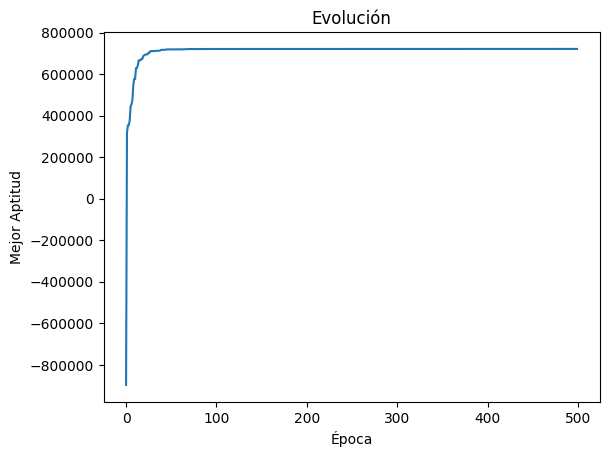

Mejores pesos encontrados: [0.202 0.161 0.141 0.126 0.112 0.1   0.088 0.07 ] con el trader #206562

Inversiones en cada opción:
Opción 1: $202,323.51
Opción 2: $161,210.37
Opción 3: $140,669.59
Opción 4: $126,041.65
Opción 5: $112,035.89
Opción 6: $100,402.61
Opción 7: $87,579.61
Opción 8: $69,736.77

Retornos para cada opción:
Opción 0: $721,773.08
Opción 1: $721,726.77
Opción 2: $721,795.74
Opción 3: $721,729.00
Opción 4: $721,991.60
Opción 5: $721,904.72
Opción 6: $721,815.21
Opción 7: $721,800.76

Retorno Mínimo: $721,726.77
Retorno Máximo: $5,774,536.88


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

class Trader:
    Unique_ids = 0

    def __init__(self, capital, shares, weights=None):
        self.Id = Trader.Unique_ids
        Trader.Unique_ids += 1
        self.shares = shares
        self.capital = capital

        if weights is None:
            self.weights = np.random.uniform(0.,1., size=self.shares.shape[0])
            self.weights /= np.sum(self.weights)
        else:
            self.weights = weights

        self.fitness = self.set_fitness()

    def set_fitness(self):
        return np.min(self.capital * (self.weights * self.shares - 1))

    def mutation(self, mutation_rate=0.05, mutation_scale=0.01):
        for i in range(len(self.weights)):
            if rd.random() < mutation_rate:
                self.weights[i] += np.random.normal(0, mutation_scale)
                self.weights[i] = max(self.weights[i], 0.01)

        self.weights /= np.sum(self.weights)
        self.fitness = self.set_fitness()

    def __repr__(self):
        return f"Trader #{self.Id} | Fitness: {self.fitness:.2f}"

def selection_pair(population):
    selected = []
    for _ in range(2):
        contenders = rd.sample(population, 2)
        contender = max(contenders, key=lambda trader: trader.fitness)
        selected.append(contender)

    return selected

def crossover(parent1, parent2):
    p = rd.randint(1, parent1.weights.size - 1)
    child1_weights = np.concatenate((parent1.weights[:p], parent2.weights[p:]))
    child2_weights = np.concatenate((parent2.weights[:p], parent1.weights[p:]))
    child1 = Trader(parent1.capital, parent1.shares, weights=child1_weights)
    child2 = Trader(parent2.capital, parent2.shares, weights=child2_weights)
    return child1, child2

def generate_population(size, capital, cuotas):
    return [Trader(capital, cuotas) for _ in range(size)]

def evolve(capital, cuotas, epochs, population_size=500):
    Traders = generate_population(population_size, capital, cuotas)
    best_fitness_over_time = []

    for _ in range(epochs):
        best_fitness_over_time.append(Traders[0].fitness)
        Traders.sort(key=lambda trader: trader.fitness, reverse=True)
        next_generation = Traders[0:2]

        while len(next_generation) < population_size:
            parents = selection_pair(Traders)
            child1, child2 = crossover(parents[0], parents[1])
            child1.mutation()
            child2.mutation()
            next_generation += [child1, child2]

        Traders = next_generation[:population_size]

    plt.plot(range(0, epochs), best_fitness_over_time)
    plt.xlabel('Época')
    plt.ylabel('Mejor Aptitud')
    plt.title('Evolución')
    plt.show()

    return Traders[0].weights, Traders[0].Id


cuotas =  np.array([8.51, 10.68, 12.24, 13.66, 15.37, 17.15, 19.66, 24.69])
capital = 1000000
weights = evolve(capital, cuotas, 500, 500)
print("Mejores pesos encontrados:", np.round(weights[0],3), "con el trader #" + str(weights[1]))

inversiones = weights[0] * capital
print("\nInversiones en cada opción:")
for i, inversion in enumerate(inversiones, start=1):
    print(f"Opción {i}: ${inversion:,.2f}")

retornos = capital * (weights[0] * cuotas - 1)
print("\nRetornos para cada opción:")
for i in range(len(retornos)):
    print(f"Opción {i}: ${retornos[i]:,.2f}")

retorno_min = np.min(retornos)
retorno_max = np.sum(retornos)
print(f"\nRetorno Mínimo: ${retorno_min:,.2f}")
print(f"Retorno Máximo: ${retorno_max:,.2f}")